In [1]:
import cv2 as cv
import numpy as np

In [2]:
from evaluation.simulator import *

time_config = TimingConfig(
    frames_per_sec=60,
    imaging_time_ms=200,
    pred_time_ms=40,
    moving_time_ms=50,
    px_per_mm=90,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.225, 0.225),
    init_position=(1300, 1200),
    frame_padding_value=(255, 255, 255),
)

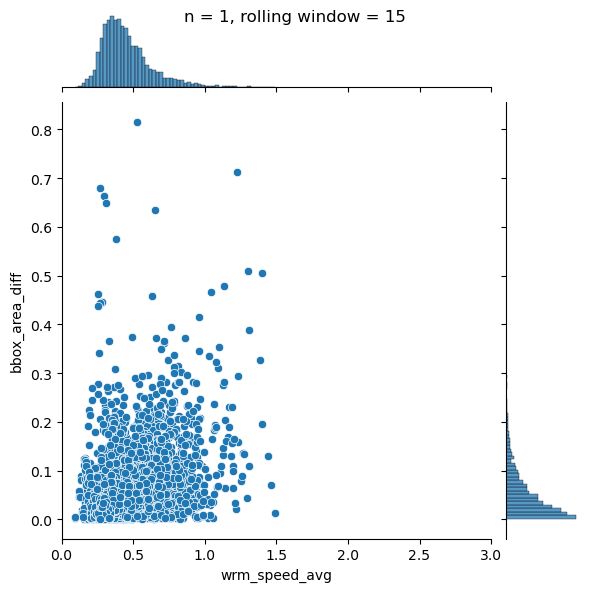

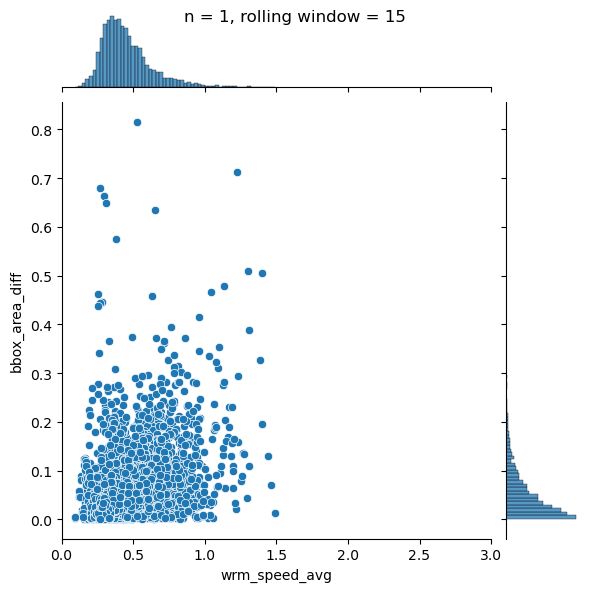

In [6]:
from evaluation.analysis import Plotter
plt = Plotter("logs2/bboxes.csv", time_config)
plt.plot_area_vs_speed_guy()

In [ ]:
cv.destroyAllWindows()
raise Exception("Finished")

In [ ]:
from evaluation.simulator import *
from evaluation.sim_controllers import *
from utils.path_utils import Files

time_config = TimingConfig(
    frames_per_sec=60,
    imaging_time_ms=200,
    pred_time_ms=40,
    moving_time_ms=50,
    px_per_mm=90,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.225, 0.225),
    init_position=(1300, 1200),
    frame_padding_value=(255, 255, 255),
)

log_config = LogConfig(
    root_folder="logs2/",
    save_mic_view=False,
    save_cam_view=False,
    save_err_view=False,
)

yolo_config = YoloConfig(
    model_path="yolov8m-trained.pt",
    verbose=True,
)

log_config.create_dirs()


""" time_config.save_json("logs/time_config.json")
log_config.save_json("logs/log_config.json")
yolo_config.save_json("logs/yolo_config.json") """


""" frames_path = "Archive/"
files = Files(frames_path, extension="Bmp", sorting_key=lambda f: int(f.split("-")[-1].split(".")[0]))
files_list = [file for file in files]
reader = FrameReader(frames_path, files_list) """

reader = FrameReader.create_from_directory("/mnt/c/Users/freid/Desktop/eval/micro")

""" time_config = TimingConfig.load_json("logs/time_config.json")
log_config = LogConfig.load_json("logs/log_config.json")
yolo_config = YoloConfig.load_json("logs/yolo_config.json") """

In [ ]:
print(time_config.imaging_frame_num + time_config.moving_frame_num)

In [ ]:
motor = SimpleMovementController(time_config)

#sim_controller = YoloController(time_config, yolo_config)
sim_controller = OptimalController(time_config, "logs/bboxes.csv")
#sim_controller = CsvController(time_config, "logs/bboxes.csv")
log_controller = LoggingController(sim_controller, log_config)
sim = Simulator(time_config, reader, log_controller, motor)

In [ ]:
sim.run(visualize=False)

In [ ]:
cv.destroyAllWindows()
raise Exception("Finished")

In [ ]:
from frame_reader import FrameReader

reader = FrameReader.create_from_directory("Archive/")

In [ ]:
from dataset.create.box_calculator import BoxCalculator
from dataset.create.sample_extractor import SampleExtractor

bbox_calc = BoxCalculator(reader)
extractor = SampleExtractor(bbox_calc)
extractor.create_all_samples(target_size=(400, 400), save_folder="samples")